# Prediction Pets Adoption

In [33]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report,confusion_matrix

### Load data

In [4]:
df=pd.read_csv(r'C:\Users\leo21\Desktop\Upgrade_hub\Futuros_proyectos\pets\pet_adoption_data.csv')
df

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,2502,Dog,Poodle,72,Orange,Small,27.039045,1,0,66,26,1,1
2003,2503,Rabbit,Rabbit,124,Brown,Small,4.726954,1,1,59,150,0,0
2004,2504,Rabbit,Rabbit,113,Orange,Small,1.758592,1,0,68,302,0,0
2005,2505,Dog,Labrador,12,Gray,Large,20.961592,1,0,59,478,0,0


### Data Cleaning

In [5]:
df['PetType'].unique()

array(['Bird', 'Rabbit', 'Dog', 'Cat'], dtype=object)

In [6]:
df.isnull().sum()

PetID                 0
PetType               0
Breed                 0
AgeMonths             0
Color                 0
Size                  0
WeightKg              0
Vaccinated            0
HealthCondition       0
TimeInShelterDays     0
AdoptionFee           0
PreviousOwner         0
AdoptionLikelihood    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PetID               2007 non-null   int64  
 1   PetType             2007 non-null   object 
 2   Breed               2007 non-null   object 
 3   AgeMonths           2007 non-null   int64  
 4   Color               2007 non-null   object 
 5   Size                2007 non-null   object 
 6   WeightKg            2007 non-null   float64
 7   Vaccinated          2007 non-null   int64  
 8   HealthCondition     2007 non-null   int64  
 9   TimeInShelterDays   2007 non-null   int64  
 10  AdoptionFee         2007 non-null   int64  
 11  PreviousOwner       2007 non-null   int64  
 12  AdoptionLikelihood  2007 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 204.0+ KB


In [8]:
df['PetType'].value_counts()

PetType
Dog       522
Cat       505
Rabbit    493
Bird      487
Name: count, dtype: int64

In [9]:
df['AdoptionLikelihood'].value_counts()

AdoptionLikelihood
0    1348
1     659
Name: count, dtype: int64

### Data Visualization

Text(0.5, 0, 'PetType')

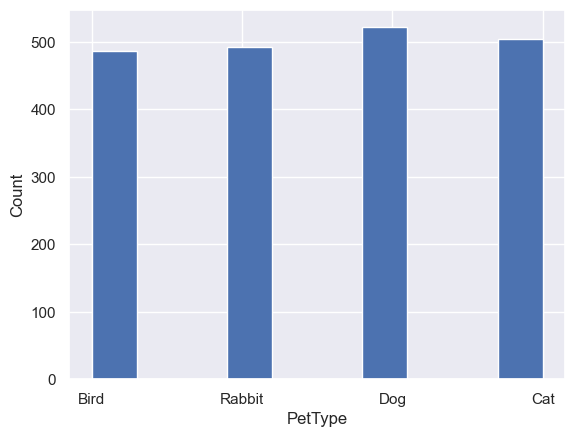

In [12]:
df.PetType.hist()
plt.ylabel('Count')
plt.xlabel('PetType')

In [14]:
content_type = df.groupby(['Breed']).size().reset_index(name='counts')
content_type

fig = px.pie(content_type, names = 'Breed',values = 'counts',color_discrete_sequence =  px.colors.sequential.Agsunset,
             title = 'Distribution of Breed',height =  700 , width = 900)
fig.show()

In [15]:
content_type = df.groupby(['PetType']).size().reset_index(name='counts')
content_type

fig = px.pie(content_type, names = 'PetType',values = 'counts',color_discrete_sequence =  px.colors.sequential.Agsunset,
             title = 'Distribution of pet type',height =  700 , width = 900)
fig.show()

Text(0.5, 0, 'Adoption Likelihood')

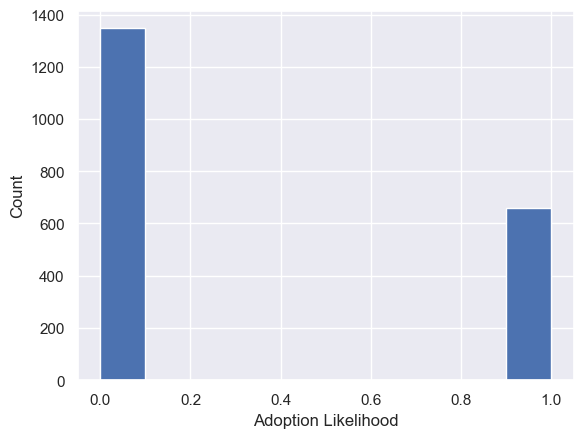

In [16]:
df.AdoptionLikelihood.hist()
plt.ylabel('Count')
plt.xlabel('Adoption Likelihood')

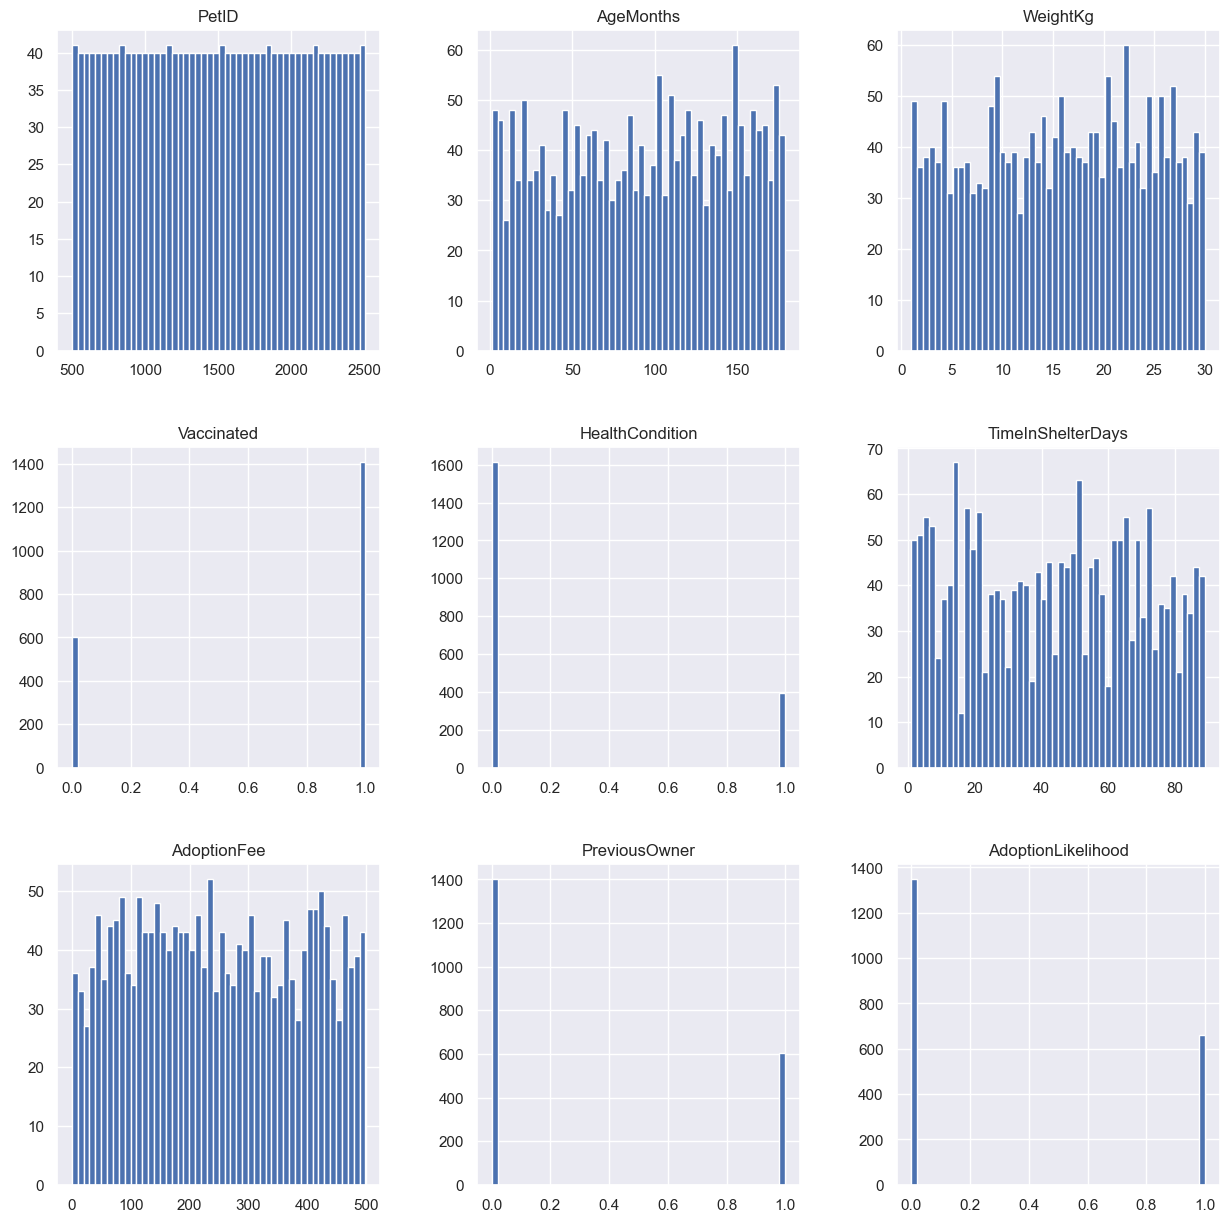

In [17]:
df.hist(bins=50,figsize=(15,15))
plt.show()

([0, 1, 2, 3],
 [Text(0, 0, 'Bird'),
  Text(1, 0, 'Rabbit'),
  Text(2, 0, 'Dog'),
  Text(3, 0, 'Cat')])

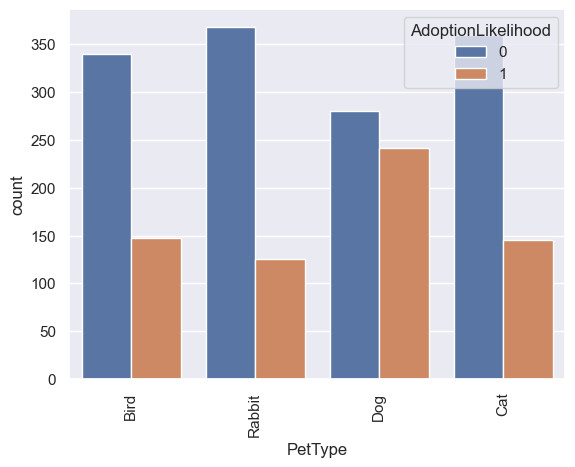

In [18]:
sns.countplot(x = df['PetType'],  hue = df['AdoptionLikelihood'])
plt.xticks(rotation=90)

## ---Feature Engineering---

In [19]:
# Separamos la variable objetivo
target=df['AdoptionLikelihood']
target

0       0
1       0
2       0
3       0
4       0
       ..
2002    1
2003    0
2004    0
2005    0
2006    0
Name: AdoptionLikelihood, Length: 2007, dtype: int64

In [20]:
# Eliminamos la variable objetivo del conjunto de datos
df=df.drop('AdoptionLikelihood', axis=1)

In [21]:
# Identificamos las variables categóricas y numéricas
Numerical_col=[]
Categorical_col=[]
for feature in df.columns:
    if df[feature].dtype!="object":
        Numerical_col.append(feature)
    else:
        Categorical_col.append(feature)

In [22]:
Categorical_col

['PetType', 'Breed', 'Color', 'Size']

In [44]:
# Mapeamos las variables categóricas petType y size en valores numéricos
df["PetType"]=df["PetType"].map({"Bird":0,"Rabbit":1,"Dog":2,"Cat":3})
df["Size"]=df["Size"].map({"Small":0,"Large":1,"Medium":2})

In [26]:
# Convertimos breed y color en variables dummy
df=pd.get_dummies(df, columns=['Breed', 'Color'], drop_first=True)

In [27]:
df

,PetID,PetType,AgeMonths,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,Breed_Labrador,Breed_Parakeet,Breed_Persian,Breed_Poodle,Breed_Rabbit,Breed_Siamese,Color_Brown,Color_Gray,Color_Orange,Color_White
0,500,0,131,1,5.039768,1,0,27,140,0,False,True,False,False,False,False,False,False,True,False
1,501,1,73,1,16.086727,0,0,8,235,0,False,False,False,False,True,False,False,False,False,True
2,502,2,136,2,2.076286,0,0,85,385,0,False,False,False,False,False,False,False,False,True,False
3,503,0,97,0,3.339423,0,0,61,217,1,False,True,False,False,False,False,False,False,False,True
4,504,1,123,1,20.498100,0,0,28,14,1,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,2502,2,72,0,27.039045,1,0,66,26,1,False,False,False,True,False,False,False,False,True,False
2003,2503,1,124,0,4.726954,1,1,59,150,0,False,False,False,False,True,False,True,False,False,False
2004,2504,1,113,0,1.758592,1,0,68,302,0,False,False,False,False,True,False,False,False,True,False
2005,2505,2,12,1,20.961592,1,0,59,478,0,True,False,False,False,False,False,False,True,False,False


In [45]:
# Nos aseguramos que las columnas de la lista sean de tipo entero
List=["Breed_Labrador","Breed_Parakeet","Breed_Persian","Breed_Poodle","Breed_Siamese","Breed_Rabbit","Color_Brown",
     "Color_Gray","Color_Orange","Color_White"]
df[List]=df[List].astype(int)

In [30]:
df

,PetID,PetType,AgeMonths,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,Breed_Labrador,Breed_Parakeet,Breed_Persian,Breed_Poodle,Breed_Rabbit,Breed_Siamese,Color_Brown,Color_Gray,Color_Orange,Color_White
0,500,0,131,1,5.039768,1,0,27,140,0,0,1,0,0,0,0,0,0,1,0
1,501,1,73,1,16.086727,0,0,8,235,0,0,0,0,0,1,0,0,0,0,1
2,502,2,136,2,2.076286,0,0,85,385,0,0,0,0,0,0,0,0,0,1,0
3,503,0,97,0,3.339423,0,0,61,217,1,0,1,0,0,0,0,0,0,0,1
4,504,1,123,1,20.498100,0,0,28,14,1,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,2502,2,72,0,27.039045,1,0,66,26,1,0,0,0,1,0,0,0,0,1,0
2003,2503,1,124,0,4.726954,1,1,59,150,0,0,0,0,0,1,0,1,0,0,0
2004,2504,1,113,0,1.758592,1,0,68,302,0,0,0,0,0,1,0,0,0,1,0
2005,2505,2,12,1,20.961592,1,0,59,478,0,1,0,0,0,0,0,0,1,0,0


In [32]:
# Estandarizamos los datos
scaler=StandardScaler()
x=scaler.fit_transform(df)
x

array([[-1.73118802, -1.36664934,  0.74269116, ..., -0.49890983,
         1.97663615, -0.51444172],
       [-1.72946201, -0.46793858, -0.36979735, ..., -0.49890983,
        -0.50591   ,  1.94385479],
       [-1.727736  ,  0.43077217,  0.83859535, ..., -0.49890983,
         1.97663615, -0.51444172],
       ...,
       [ 1.727736  , -0.46793858,  0.39743611, ..., -0.49890983,
         1.97663615, -0.51444172],
       [ 1.72946201,  0.43077217, -1.53982838, ...,  2.00437023,
        -0.50591   , -0.51444172],
       [ 1.73118802, -0.46793858,  0.64678698, ..., -0.49890983,
        -0.50591   ,  1.94385479]])

In [34]:
# Dividimos los datos para entrenamiento y prueba
X_train,X_test,y_train,y_test=train_test_split(x,target,test_size=0.2, random_state=42)

In [35]:
len(X_train)

1605

In [36]:
len(X_test)

402

### Build Model

In [37]:
#Creamos modelo de red neuronal con varias capas densas
model_ANN=keras.Sequential([
    keras.layers.Dense(20,input_shape=(20,),activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
    
])

model_ANN.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
)
# Entrenamos el modelo con 50 épocas
model_ANN.fit(X_train,y_train,epochs=50)

c:\Users\leo21\Desktop\Upgrade_hub\mi_entorno\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5065 - loss: 0.6966
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6882 - loss: 0.5774
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7474 - loss: 0.5002
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7908 - loss: 0.4521
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8293 - loss: 0.3983
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8507 - loss: 0.3630
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8775 - loss: 0.3222
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8781 - loss: 0.3132
Epoch 9/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8822 - loss: 0.3060
Epoch 10/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8864 - loss: 0.2956
Epoch 11/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9088 - loss: 0.2521
Epoch 12/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9167 - lo

In [38]:
model_ANN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         1,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,535 (29.44 KB)

 Trainable params: 2,511 (9.81 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,024 (19.63 KB)

### Evaluation

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       270
           1       0.83      0.87      0.85       132

    accuracy                           0.90       402
   macro avg       0.88      0.89      0.89       402
weighted avg       0.90      0.90      0.90       402



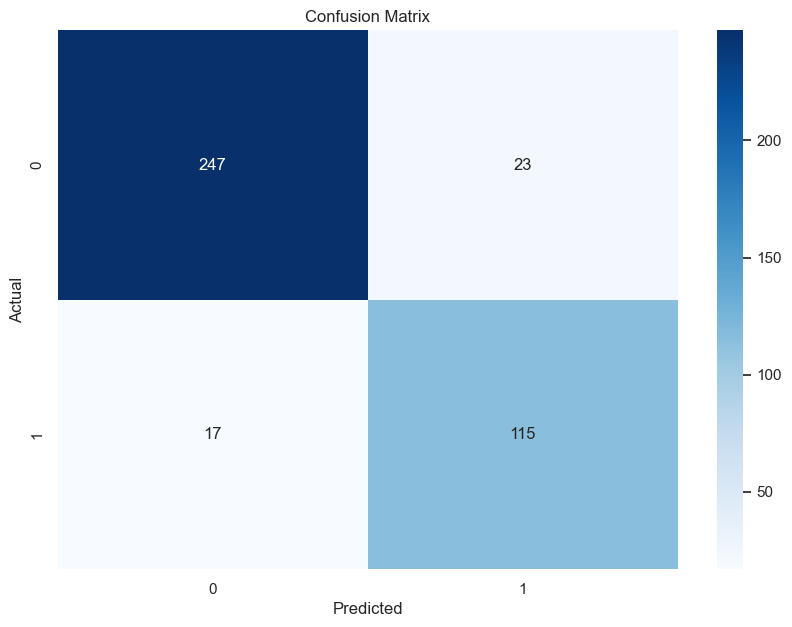

In [48]:
def evaluate_model(model_ANN, X_test, y_test):
    # Predicciones
    y_pred = model_ANN.predict(X_test)
    y_pred = (y_pred > 0.5)
    
    # Reporte de clasificación
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Evaluar el modelo
evaluate_model(model_ANN, X_test, y_test)

## Conclusiones

Desglose de la Matriz de Confusión:
- 247 (Verdaderos Negativos): El modelo predijo correctamente 247 instancias de la clase 0.
- 23 (Falsos Positivos): El modelo predijo incorrectamente 23 instancias de la clase 0 como clase 1.
- 17 (Falsos Negativos): El modelo predijo incorrectamente 17 instancias de la clase 1 como clase 0.
- 115 (Verdaderos Positivos): El modelo predijo correctamente 115 instancias de la clase 1.

Conclusiones:
- Precisión Global: El modelo tiene una precisión global del 90% (accuracy), lo que significa que el 90% de las predicciones fueron correctas.

Clase 0:
- Precisión: 0.94 (94% de las predicciones de la clase 0 fueron correctas).
- Recall: 0.91 (91% de las instancias reales de la clase 0 fueron correctamente identificadas).

Clase 1:
- Precisión: 0.83 (83% de las predicciones de la clase 1 fueron correctas).
- Recall: 0.87 (87% de las instancias reales de la clase 1 fueron correctamente identificadas).

F1-Score:
- Clase 0: 0.93
- Clase 1: 0.85

Observaciones:
- Clase 0: El modelo tiene un rendimiento muy bueno en la clase 0, con alta precisión y recall.
- Clase 1: Aunque el rendimiento es ligeramente inferior en la clase 1, sigue siendo bastante bueno con una precisión del 83% y un recall del 87%.

Conclusión General:
El modelo de red neuronal artificial (ANN) utilizado para la predicción de adopción de mascotas tiene un rendimiento sólido, especialmente en la clase 0. Aunque hay margen de mejora en la clase 1, los resultados generales son positivos, con una alta precisión y recall en ambas clases. Esto sugiere que el modelo es eficaz para predecir correctamente la mayoría de las instancias en ambas clases.